In [31]:
# read the image
# using matplotlib
from matplotlib import image
from matplotlib import pyplot
import os
import numpy as np

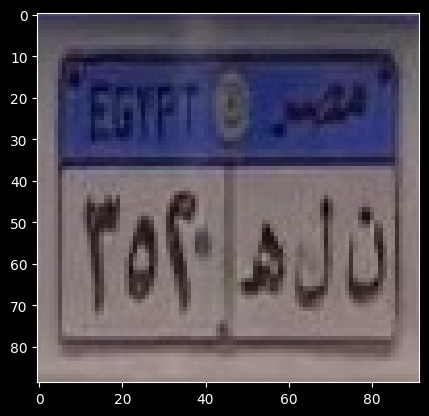

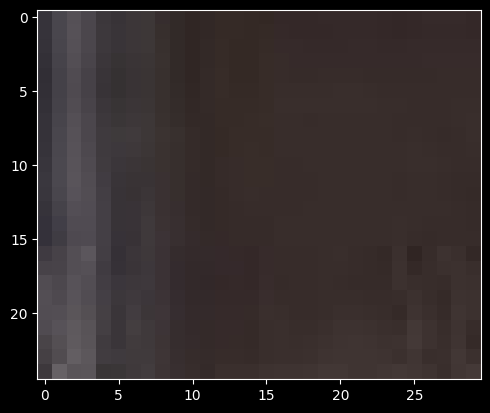

In [32]:
##read the croped images and predict the car model
cars = []
for filename in os.listdir('temp_plates'):
    file_path = os.path.join('temp_plates', filename)
    #print(file_path)
    # load image as pixel array
    data = image.imread(file_path)
    # plot image
    pyplot.imshow(data)
    pyplot.show()
    cars.append(data)
    #print(corped_cars)

In [33]:
! yolo task=detect \
mode=predict \
model=Recognizers/wolo.pt \
conf=0.25 \
source='temp_plates'

Ultralytics YOLOv8.0.96 🚀 Python-3.10.10 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3904MiB)
YOLOv8n summary (fused): 168 layers, 3011303 parameters, 0 gradients, 8.1 GFLOPs

image 1/2 /run/media/ahmed/Hay/Egyptian plate cars recognizer/Egyptian plate cars recognizer/temp_plates/plate0.jpg: 608x608 1 2, 1 3, 1 5, 1 haa, 1 lam, 1 non, 7.6ms
image 2/2 /run/media/ahmed/Hay/Egyptian plate cars recognizer/Egyptian plate cars recognizer/temp_plates/plate1.jpg: 512x608 (no detections), 58.8ms
Speed: 6.9ms preprocess, 33.2ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 608)
Results saved to runs/detect/predict3


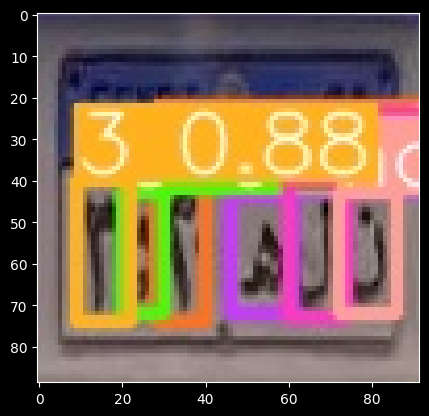

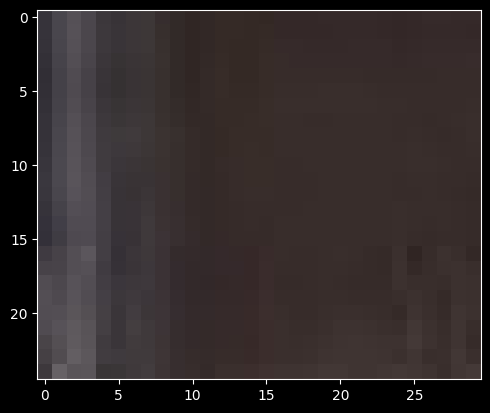

In [34]:
##read the croped images and predict the car model
pltes_pe = []
for filename in os.listdir('runs/detect/predict3'):
    file_path = os.path.join('runs/detect/predict3', filename)
    #print(file_path)
    # load image as pixel array
    data = image.imread(file_path)
    # plot image
    pyplot.imshow(data)
    pyplot.show()
    pltes_pe.append(data)
    #print(corped_cars)

In [35]:
# read polo wodel ==> car's plate reconizer using yolov8
from ultralytics import YOLO

wolo = YOLO("Recognizers/wolo.pt")

In [96]:
test = wolo(cars[0])



0: 608x608 1 2, 1 3, 1 5, 1 haa, 1 lam, 1 non, 8.7ms
Speed: 15.9ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 608)


In [97]:
test

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'aain', 11: 'ain', 12: 'alf', 13: 'baa', 14: 'dal', 15: 'faa', 16: 'geem', 17: 'haa', 18: 'kaf', 19: 'lam', 20: 'meem', 21: 'non', 22: 'raa', 23: 'sad', 24: 'sen', 25: 'taa', 26: 'waaw', 27: 'yaa', 28: 'zen'}
 orig_img: array([[[ 71,  64,  98],
         [ 72,  65,  99],
         [ 73,  66, 100],
         ...,
         [ 98,  87, 127],
         [ 95,  84, 127],
         [ 96,  85, 128]],
 
        [[ 63,  56,  87],
         [ 62,  55,  86],
         [ 61,  54,  85],
         ...,
         [ 69,  59,  94],
         [ 65,  55,  92],
         [ 60,  49,  89]],
 
        [[ 70,  65,  85],
         [ 69,  64,  84],
         [ 67,  62,  82],
         ...,
         [ 61,  52,  79],
         [ 61,  52,  81],
         [ 63,  54,  83]],
 
  

In [36]:
# get paltes from the car xywh
plates = []
for i in range(len(cars)):
    plate = wolo(cars[i])
    print(plate[0].boxes.xywh)
    plates.append(plate[0].boxes.xywh)




0: 608x608 1 2, 1 3, 1 5, 1 haa, 1 lam, 1 non, 7.6ms
Speed: 2.1ms preprocess, 7.6ms inference, 4.9ms postprocess per image at shape (1, 3, 608, 608)

0: 512x608 (no detections), 29.8ms
Speed: 1.6ms preprocess, 29.8ms inference, 0.5ms postprocess per image at shape (1, 3, 608, 608)


tensor([[15.4365, 57.8370, 13.0494, 34.2485],
        [67.3329, 57.7253, 14.0597, 32.3919],
        [79.0357, 57.7608, 14.8028, 29.4963],
        [25.4974, 58.6664, 10.6033, 28.8047],
        [34.7544, 57.3522, 12.2723, 34.3754],
        [53.8572, 58.6102, 15.8273, 28.0784]], device='cuda:0')
tensor([], device='cuda:0', size=(0, 4))


In [37]:
plates




[tensor([[15.4365, 57.8370, 13.0494, 34.2485],
         [67.3329, 57.7253, 14.0597, 32.3919],
         [79.0357, 57.7608, 14.8028, 29.4963],
         [25.4974, 58.6664, 10.6033, 28.8047],
         [34.7544, 57.3522, 12.2723, 34.3754],
         [53.8572, 58.6102, 15.8273, 28.0784]], device='cuda:0'),
 tensor([], device='cuda:0', size=(0, 4))]

In [38]:
# remove empty plates with nelement() == 0
plates = [plate for plate in plates if plate.nelement() != 0]
plates


[tensor([[15.4365, 57.8370, 13.0494, 34.2485],
         [67.3329, 57.7253, 14.0597, 32.3919],
         [79.0357, 57.7608, 14.8028, 29.4963],
         [25.4974, 58.6664, 10.6033, 28.8047],
         [34.7544, 57.3522, 12.2723, 34.3754],
         [53.8572, 58.6102, 15.8273, 28.0784]], device='cuda:0')]

In [89]:
# crop the cars from the image and add them to temp_plates folder

import cv2
import os

# Create target Directory if don't exist
if not os.path.exists('temp_plates2'):
    os.mkdir('temp_plates2')
    print("Directory " , 'temp_plates2' ,  " Created ")
else:
    print("Directory " , 'temp_plates2' ,  " already exists")
    # remove all files in temp folder
    for filename in os.listdir('temp_plates2'):
        file_path = os.path.join('temp_plates2', filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))


Directory  temp_plates2  already exists


In [90]:
len(plates)

1

In [91]:
pltes_has_chars = []
for i in range(len(plates)):
    pltes_has_chars.append(cars[i])

In [92]:
m=0

In [93]:
#crop letters from the plate
for img in pltes_has_chars:
    for i in range(len(plates)):
        for plate in plates[i]:
            print(i)
            x, y, w, h = plate
            x_top_left= int(x - w/2)
            y_top_left= int(y - h/2)
            x_bottom_right= int(x + w/2)
            y_bottom_right= int(y + h/2)
            #print(x, y, w, h)
            crop_img = img[y_top_left:y_bottom_right, x_top_left:x_bottom_right]
            #cv2.imshow("cropped", crop_img)
            #cv2.waitKey(0)
            #cv2.destroyAllWindows()
            cv2.imwrite(f"temp_plates2/{m+1}.jpg", crop_img)
            m+=1


0
0
0
0
0
0


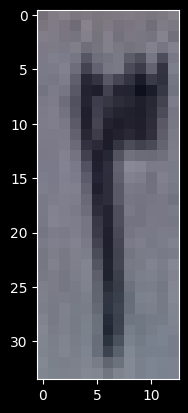

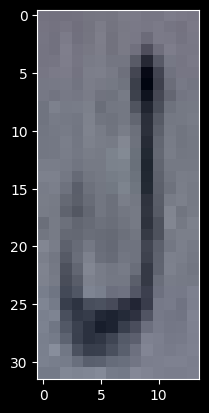

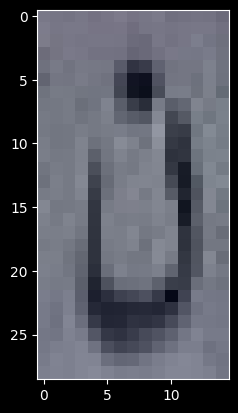

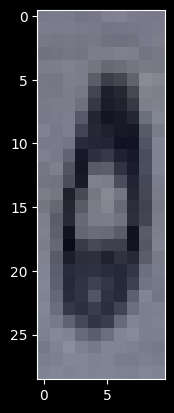

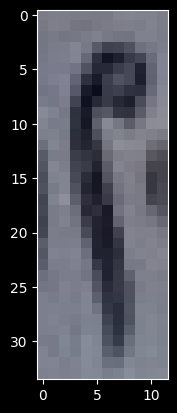

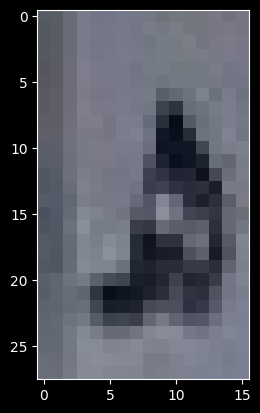

In [95]:
# read the croped images and predict the car model
corped_cars = []
for filename in os.listdir('temp_plates2'):
    file_path = os.path.join('temp_plates2', filename)
    #print(file_path)
    # load image as pixel array
    data = image.imread(file_path)
    # plot image
    pyplot.imshow(data)
    pyplot.show()
    corped_cars.append(data)
    #print(corped_cars)

In [98]:
test = wolo(pltes_has_chars[0])


0: 608x608 1 2, 1 3, 1 5, 1 haa, 1 lam, 1 non, 7.7ms
Speed: 16.6ms preprocess, 7.7ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 608)


In [122]:
test[0].boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[ 8.9118, 40.7127, 21.9612, 74.9613,  0.8885,  3.0000],
        [60.3031, 41.5294, 74.3628, 73.9213,  0.8240, 19.0000],
        [71.6343, 43.0127, 86.4371, 72.5090,  0.7891, 21.0000],
        [20.1957, 44.2640, 30.7991, 73.0687,  0.6603,  5.0000],
        [28.6182, 40.1645, 40.8905, 74.5399,  0.5630,  2.0000],
        [45.9436, 44.5710, 61.7709, 72.6494,  0.4307, 17.0000]], device='cuda:0')
cls: tensor([ 3., 19., 21.,  5.,  2., 17.], device='cuda:0')
conf: tensor([0.8885, 0.8240, 0.7891, 0.6603, 0.5630, 0.4307], device='cuda:0')
data: tensor([[ 8.9118, 40.7127, 21.9612, 74.9613,  0.8885,  3.0000],
        [60.3031, 41.5294, 74.3628, 73.9213,  0.8240, 19.0000],
        [71.6343, 43.0127, 86.4371, 72.5090,  0.7891, 21.0000],
        [20.1957, 44.2640, 30.7991, 73.0687,  0.6603,  5.0000],
        [28.6182, 40.1645, 40.8905, 74.5399,  0.5630,  2.0000],
        [45.9436, 44.5710, 61.7709, 72.6494,  0.4307, 17.0000

In [108]:
names = test[0].names
names

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'aain',
 11: 'ain',
 12: 'alf',
 13: 'baa',
 14: 'dal',
 15: 'faa',
 16: 'geem',
 17: 'haa',
 18: 'kaf',
 19: 'lam',
 20: 'meem',
 21: 'non',
 22: 'raa',
 23: 'sad',
 24: 'sen',
 25: 'taa',
 26: 'waaw',
 27: 'yaa',
 28: 'zen'}

In [128]:
# get test boxes xywh
boxes = test[0].boxes.xywh
boxes

tensor([[15.4365, 57.8370, 13.0494, 34.2485],
        [67.3329, 57.7253, 14.0597, 32.3919],
        [79.0357, 57.7608, 14.8028, 29.4963],
        [25.4974, 58.6664, 10.6033, 28.8047],
        [34.7544, 57.3522, 12.2723, 34.3754],
        [53.8572, 58.6102, 15.8273, 28.0784]], device='cuda:0')

In [129]:
clss = test[0].boxes.cls
clss

tensor([ 3., 19., 21.,  5.,  2., 17.], device='cuda:0')

In [133]:
for i in clss:
    print(int(i.cpu().numpy()))

3
19
21
5
2
17


In [146]:
list_boxes = []
for x, y, w, h in boxes:
    x= float(x.cpu().numpy())
    y= float(y.cpu().numpy())
    w= float(w.cpu().numpy())
    h= float(h.cpu().numpy())
    # print(x)
    list_boxes.append([x, y, w, h])

In [152]:
list_boxes

25.497406005859375

In [153]:
#make a dictionary of the boxes map to the class
dict_boxes = {}
for i in range(len(clss)):
    dict_boxes[int(clss[i].cpu().numpy())] = list_boxes[i]
    

In [154]:
dict_boxes

{3: [15.436517715454102,
  57.836997985839844,
  13.049449920654297,
  34.24853515625],
 19: [67.33293151855469,
  57.725341796875,
  14.05972671508789,
  32.39188766479492],
 21: [79.03572082519531,
  57.76082992553711,
  14.802810668945312,
  29.49633026123047],
 5: [25.497406005859375,
  58.666358947753906,
  10.603326797485352,
  28.804729461669922],
 2: [34.754371643066406,
  57.35223388671875,
  12.272344589233398,
  34.37539291381836],
 17: [53.85722351074219,
  58.61017608642578,
  15.827316284179688,
  28.078426361083984]}

In [155]:
sorted_dic_using_x_axis_from_right_to_left = sorted(dict_boxes.items(), key=lambda x: x[1][0], reverse=True)
sorted_dic_using_x_axis_from_right_to_left

[(21,
  [79.03572082519531,
   57.76082992553711,
   14.802810668945312,
   29.49633026123047]),
 (19,
  [67.33293151855469, 57.725341796875, 14.05972671508789, 32.39188766479492]),
 (17,
  [53.85722351074219,
   58.61017608642578,
   15.827316284179688,
   28.078426361083984]),
 (2,
  [34.754371643066406,
   57.35223388671875,
   12.272344589233398,
   34.37539291381836]),
 (5,
  [25.497406005859375,
   58.666358947753906,
   10.603326797485352,
   28.804729461669922]),
 (3,
  [15.436517715454102,
   57.836997985839844,
   13.049449920654297,
   34.24853515625])]

In [157]:
#use key of the sorted dictionary to get the class name
for i in sorted_dic_using_x_axis_from_right_to_left:
    print(names[i[0]])
    


non
lam
haa
2
5
3
